In [1]:
from IPython import display
def hide_code_in_slideshow():
    import os
    uid = os.urandom(8).encode("hex")
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;

            while (!p.hasClass("cell")) {
                p=p.parent();

                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)

# Feature Importance outline

### Feature importance
- Introduction and motivation for discussing feature importance:
    - Define feature importance (using a fuzzy definition -- rank features by how much they "*contribute*" to the prediction function).
    - Feature importance measures are frequently reported, in part because many packages make them easy to compute/visualize.
        - Show google image search results
    - They can be potentially misleading. Important to understand potential pitfalls.
    - Utility of feature importance:
        - Feature selection -- use votes example from original Breiman Random Forests paper.
        - Sanity checking models/detecting leakage (TODO: see if I can find an example where feature importance show some feature unexpectedly popping since due to leakage).
- Framing feature importance methods:
    - Divide into two classes:
        - Methods that exploit the structure of the prediction function or learning algorithm (call these function-specific).
        - Methods that are agnostic (i.e. can be applied to any black box prediction function).
- Function-specific methods:
    - Mean decrease impurity:
        - Frame running example:
            - Introduce the iris dataset and classification problem.
            - graphviz some shallow tree on the iris dataset (see below).
            - **Ask students** which features seem "important" as a turn and talk. Have some subset share answers without explanation.
        - Introduce MDE:
        $$Imp(X_m) = \frac{1}{N_T}\sum_T\sum_{t \in T:v(s_t)=X_m}p(t)\Delta i(s_t,t)$$
        - Show from scratch implimentation (see lab_outline_and_mean_decrease_impurity.ipynb).
        - Show correspondance with sklearn's implementation.
        - **Ask students** what other classifiers we could extend this too (Random Forests/GBMs) and how (averaging).
        - Show RF importance for the iris problem.
        - Say there are variants:
            - Example: CART implementation exposes a knob to add weight for use of a feature as a surrogate split.
    - Absolute coefficients in a linear model:
        - **Ask students** how we could determine feature importance in a linear model.
        - Show some example (TODO) of extracting absolute $\beta$s from a model.
        - **Ask students**: How would this interact with preprocessing?
- Model agnostic methods:
    - Frame the general problem for global feature importance:
        - Another framing of feature importance -- we are trying to identify how much each feature independently contributes to risk reduction in the learned model.
        - **Ask students**: How could we do this for an arbitrary black box prediction function?
        - **Hint (fragment slide)**: Imagine you were tasked with constructing a synthetic dataset with an *unimportant* feature -- how could you construct it? Given this insight, what operation could be applied to a feature that would be expected to have (a) no impact on empirical risk for unimportant features, and (b) decrease performance for important featuers?
    - Permutation importance:
        - Give Breimans original OOB permutation feature importance.
        - Say that the OOB version exploits bootstrapping in RFs, but can just use a validation set.
        - Show example (using ELI5 implementation) over the iris problem.
        - **Ask students**: This method permute features to get a measure of feature importance. Let's extend this concept a bit -- how could permuting the target be useful in interogating the performance of a model?
        - http://jmlr.csail.mit.edu/papers/volume11/ojala10a/ojala10a.pdf
        - For fun show this using permutation_test_score for the iris data.
- Pitfalls:
    - Correlated features
        - Show the GBM feature importance for duplicated or highly correlated features (TODO: think about which is better for this purpose) (from lab_outline_and_mean_decrease_impurity.ipynb).
        - **Ask students**: Interpret this plot. What can we say about the features/model?
        - Show same plot for enet, and ask same question -- hopefully students will recall that (at least in the context of linear models) our conversations about feature correlation.
        - Show the elastnic net bound result as review, and primer to think about correlation issues.
        - Show correlation matrix/matrices (duplicated and/or highly correlated), and known data generating process.
        - **Ask students**: Given what we know about (i) linear methods, and (ii) trees, what does this show us about potential pitfalls in interpreting feature importance plots?
        - **Ask students**: How would this impact SelectFromModel feature selection procedures (ala sklearn) which select the most important features from a model based on either absolute coefficients or feature importance scores? Why might we want to use RFE?

### PDPs
- Motivation and introduction to partial dependence plots
    - Imagine we have a subset of features we think are important.
        - This could be based on "feature importance" scores or coefficients, or other reasons (i.e. prior knowledge/research questions/etc.).
    - We may want to dig deeper to explain the relationship between our predictions and these features.
        - **Ask students**: Why? If we have MDI feature importance scores in hand, what do we not know?
            - Directionality:
                - Note in reality we probably have complex, non-monotonic relationships
                - However even if we have a monotonic relationship, or even linear, our MDI wouldn't give any indication on the direction -- obviously weights in a linear model would.
    - Partial dependence plots let us dig deeper and visualize the dependence of our prediction function (i.e. predict/predict_proba) on one or two of these features. Can't easily go higher-dimensional (Why not? Can't visualize).
    - Show basic math (marginal and empirical estimate -- see https://arxiv.org/pdf/1309.6392.pdf for useful framing).

- PDP examples:
    - Show sklearn example (see partial_dependence.ipynb).
    - **Ask students**: What does this plot show? How do we interpret it? 
- PDP pitfalls:
    - Show the flat partial dependence plot from (https://arxiv.org/pdf/1309.6392.pdf) reproduced in partial_dependence.ipynb.
    - **Ask students**: What does this plot show?
    - Follow up with big reveal:
        - Show data generating process and X plot.
    - **Ask students**: What does this teach us? When might PDPs fail?
    - Share "not too strong" quote from Friedman's original work (see partial_dependence.ipynb).
    
### Additional material
- If 100 minutes allows (what is your opinion, David?), the next steps would be:
    - Generate the ICE plot for the X data (figure 2 in https://arxiv.org/pdf/1309.6392.pdf)
    - Take this  as a launching point for point out that our progression has been from:
        - Global measures (feature importance) that don't necessarily describe structure (even directionality) of a relationship between a feature and target.
        - Marginalized measures showing average relationship between one or two features and the target.
        - Data-instance specific feature importance plots showing the importance of a feature, for each data instance, fixing all other feature values.
    - We can follow this thread it's conclusion -- attempting to develop model explanations that show the relative contribution of each feature to predictions locally (i.e. in the neighborhood of a specific instance):
        - LIME paper (https://arxiv.org/abs/1602.04938) as one example.


<center>
    <h1>Feature Importance</h1>
    <h4>
        Ben Jakubowski <br>
        NYU <br>
        April 18th, 2018 <br>
    </h4>
</center>

### Learning objectives
- (Informally) define feature importance, and explain why exploring and presenting feature importance can be both (i) useful, and (ii) potentially misleading.
- Define and describe several feature importance methods that exploit the structure of the learning algorithm or learned prediction function.
- Describe a prediction-function-agnostic method for generating feature importance scores.
- Describe the limitations of these feature importance measures and understand cases where they "fail".

### Defining feature importance
- Problem setup -- we have some data $(x, y) \in (\mathbb{R}^{d}, \mathcal{Y})$, and a learned prediction function $f$.
- A feature importance method can be loosely understood as a function that maps each feature onto some score.
- These scores rank features by how much they "*contribute*" to the prediction function $f$.
    - Here "*contribute*" is defined separately for each method.
    - In general, *feature importance* is not consistently or rigorously defined.

### Why we need to discuss feature importance
- It is easy to compute feature importance from many ML libraries.

![Google "feature importance" image search results](./static/google.png)

### Why we need to discuss feature importance
- It is easy to compute feature importance from many ML libraries.
- This means feature importance bar charts show up all over, and it is important to understand:
    - How feature importance can be computed.
    - Potential pitfalls in over interpreting these scores.

### Utility of feature importance scores
- Why might feature importance scores be useful?

- Use for sanity checking a model -- do the features that are important seem reasonable, or do they suggest something strange is going on under the hood (i.e. leakage)?

- Share with clients/bosses to build trust and get buy-in on the prediction function.

- Use for feature selection -- can extract the top $K$ features and retrain over this subset (ex: `sklearn.feature_selection.SelectFromModel`)

### Feature selection example
- Breiman's original Random Forests paper showed feature importance for classification of political party based on 16 votes<sup id="a1">[1](https://link.springer.com/content/pdf/10.1023/A:1010933404324.pdf)</sup>:
![Breiman's voting feature importance plot](./static/breiman_votes.png)
- *'We reran this data set using only variable 4. The test set error is 4.3%, about the same as if all variables were used.'*

### First example/introducing the  issues

- Consider the following feature importance plot for a regression problem with $$\mathcal{Y} = \mathcal{A} = \mathbb{R}, X = \mathbb{R}^{11}$$

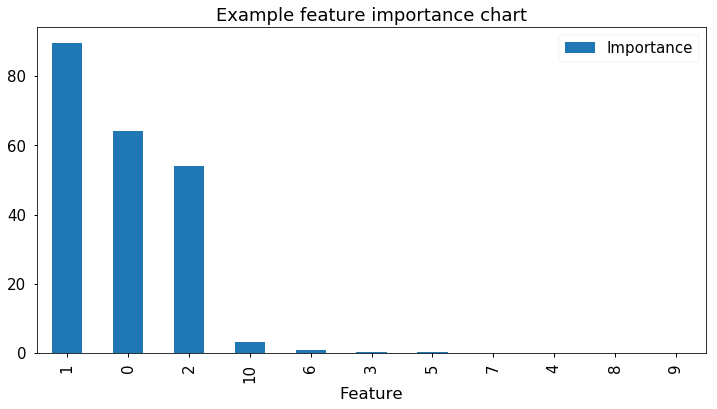

In [2]:
hide_code_in_slideshow()
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

X,y = make_regression(n_samples=1000, n_features=10,
                      n_informative=3,random_state=1234,
                      shuffle=False, noise=10)
X = np.append(X, X[:,[0]], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=1235)

enet = ElasticNetCV(l1_ratio=np.array([.1, .5, .7, .9, .95, .99, 1]),
                    n_alphas=500,
                    normalize=True,
                    selection='random',
                    random_state=1351)
enet.fit(train_X, train_y)

coefs = pd.DataFrame({'Feature': np.arange(len(enet.coef_)),
                      'Importance': np.abs(enet.coef_)})
coefs = coefs.set_index('Feature')\
             .sort_values('Importance', ascending=False)
    
fig, ax=plt.subplots(figsize=(12,6))
plot = coefs.plot(kind='bar', title='Example feature importance chart', ax=ax)

- Question: What can we say about this prediction function, it features, and target?

### First example/introducing the  issues (continued)

- Recall the full feature set includes features $\{0,\cdots,10\}$.
- Let's compare both (a) test set performance ($R^2$), and (b) feature importance plots, for models trained on:
    - All features
    - Features $\{0,\cdots,9\}$
    - Features $\{1,\cdots,9\}$
    - Features $\{1,\cdots,10\}$

### First example/introducing the  issues (continued)

- Recall the full feature set includes features $\{0,\cdots,10\}$...

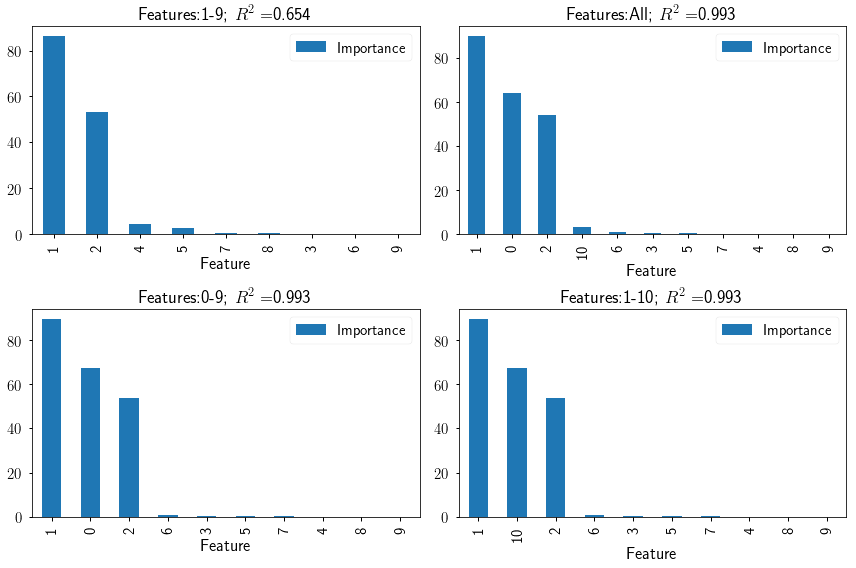

In [3]:
from matplotlib import rc
rc('text', usetex=True)

from sklearn.metrics import mean_squared_error
from math import floor

hide_code_in_slideshow()
features_to_test = {
    'All': np.arange(0,11),
    '0-9': np.arange(0,10),
    '1-9': np.arange(1,10),
    '1-10': np.arange(1,11)
}

fig, axarr = plt.subplots(ncols=2, nrows=2, figsize=(12,8))

i = 0
for model_name, features in features_to_test.items():
    col = i % 2
    row = int(floor(i/2))
    
    _train_X = train_X[:, features]
    _test_X = test_X[:, features]
    
    enet = ElasticNetCV(l1_ratio=np.array([.1, .5, .7, .9, .95, .99, 1]),
                        n_alphas=1000,
                        normalize=True,
                        selection='random',
                        random_state=1351)
    enet.fit(_train_X, train_y)

    coefs = pd.DataFrame({'Feature': features,
                          'Importance': np.abs(enet.coef_)})
    coefs = coefs.set_index('Feature')\
                 .sort_values('Importance', ascending=False)

    plot = coefs.plot(kind='bar', title='Typical feature importance chart', ax=axarr[(row,col)])
    
    title = 'Features:' + model_name + r'; $R^2$ =' + \
             str(round(enet.score(_test_X,test_y),3))
    
    axarr[(row,col)].set_title(title)
    
    i += 1
plt.tight_layout()

- What can we learn from this example?

### First example/introducing the  issues (continued)

- Here was the setup:
```
X,y = make_regression(n_samples=1000, n_features=10,
                      n_informative=3,random_state=1234,
                      shuffle=False, noise=10)
X = np.append(X, X[:,[0]], axis=1)
```

- Some things to keep in mind:
    - Interactions and correlated/dependent features makes intepretation tricky.
    - Feature importance $\ne$ dependence of target on feature
    - Feature importance $\approx$ contribution of feature to prediction function $f$
    - **This doesn't imply there do not exist other functions $f'$ where features that are 'unimportant' in $f$ are 'important'**

### Where we're headed:
- With this in mind, we're going to look at a number of methods for measuring feature importance.
- We can devide these methods into two basic classes:
    - Algorithmic/prediction-function-specific methods: These exploit the structure of the learning algorithm/prediction function to construct some measure of the relative contribution of each feature.
    - Model agnostic methods: These don't make assumptions on the algorithm or structure of the prediction function; can be applied to any black-box predictor.

### Prediction-function-specific: Trees

- Our first algorithm/prediction function specific methods will address decision trees.
- We'll use the Iris Dataset, which is a canonical classification dataset (first used by R.A. Fisher) with:
    - $\mathcal{Y} = $ {Setosa, Versicolour, Virginica} (three varieties of irises).
    - $X = $ [sepal length, sepal width, petal length, petal width] $\in \mathbb{R}^4$

### Prediction-function-specific: Trees (Continued)

- Let's consider a shallow tree built on this data.

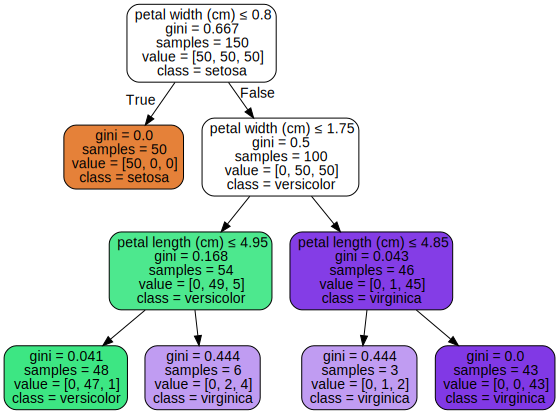

In [4]:
hide_code_in_slideshow()
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz 

iris = load_iris()
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(iris.data, iris.target)


dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
display.display(graph)

- **Question**: Which of the feature ([sepal length, sepal width, petal length, petal width]) are most important? Why?

### Prediction-function-specific: Trees (Continued)

#### Tree buiding reminders
- Consider node $t$ in a decision tree built on $N$ training data instances.
- Let node $t$ have $N_t$ node samples.
- We find the split $s_t$ at node $t$ such that $t_L$ and $t_R$ maximizes the decrease
$$\Delta i(s, t) = i(t) − p_Li(t_L) − p_Ri(t_R)$$
where $p_L$ and $p_R$ are the probabilities an instance splits left and right, respectively, and $i(t)$ is some some impurity measure.


### Prediction-function-specific: Trees (Continued)

#### Mean decrease impurity
- The **mean decrease impurity** $imp(X_m)$ for feature $X_m$ is:
$$imp(X_m) = \sum_{v(s_t)=X_m}p(t)\Delta i(s_t,t)$$
Note $p(t) = N_t/N$ is the proportion of samples reaching node $t$ and $v(s_t)$ is the variable used in split $s_t$.

### Prediction-function-specific: Trees (Continued)

$$imp(X_m) = \sum_{v(s_t)=X_m}p(t)\Delta i(s_t,t)$$

- **Question**: When will a feature be considered more important under this metric?

- **Question**: Why is this an algorithm/prediction-function specific method?


### Prediction-function-specific: Trees (Continued)

- Implementation:

In [5]:
from collections import defaultdict
import numpy as np

def feature_importance_single_tree(tree, feature_names=iris.feature_names):
    # Returns normed feature importance for a single sklearn.tree
    # Note sklearn tree's can handle instance weights, so we need
    # to use weighted_n_node_samples
    
    total_samples = np.sum(tree.weighted_n_node_samples)
    feature_importance = defaultdict(float)
    
    # Identify leaves as described in sklearn's plot_unveil_tree_structure.html
    is_leaf = (tree.children_right == tree.children_left)
    for ix in range(len(is_leaf)):
        if not is_leaf[ix]:
            impurity = tree.impurity[ix]
            split_feature = tree.feature[ix]
            num_at_node = tree.weighted_n_node_samples[ix]

            # Get left child contribution
            left_child = tree.children_left[ix]
            left_decrease = tree.weighted_n_node_samples[left_child]/num_at_node * \
                                tree.impurity[left_child]

            # Get right child contribution
            right_child = tree.children_right[ix]
            right_decrease = tree.weighted_n_node_samples[right_child]/num_at_node * \
                                tree.impurity[right_child]

            delta = impurity - left_decrease - right_decrease
            
            feature_importance[feature_names[split_feature]] \
                += num_at_node / total_samples * delta
    norm = np.sum(feature_importance.values())
    feature_importance = {key: val/norm for key, val in feature_importance.items()}
    return feature_importance

### Prediction-function-specific: Trees (Continued)

- Implementation vs. sklearn

In [6]:
imp = feature_importance_single_tree(clf.tree_)
display.display(pd.Series(imp).rename('Importance').to_frame()\
                  .reset_index().rename(columns={'index':'Feature'}))

,Feature,Importance
0,petal length (cm),0.053936
1,petal width (cm),0.946064


In [7]:
display.display(pd.DataFrame({'Feature': iris.feature_names,
                              'Importance':clf.feature_importances_})\
                  .sort_values('Importance', ascending=False))

,Feature,Importance
3,petal width (cm),0.946064
2,petal length (cm),0.053936
0,sepal length (cm),0.000000
1,sepal width (cm),0.000000


### Prediction-function-specific: Trees (Continued)

- **Question**: How do we extend this to ensembles of trees?

- **Answer**: (Weighted) averages.
    - Ex: Random Forests with $N_T$ trees:
    
$$Imp(X_m) = \frac{1}{N_T}\sum_T\sum_{t \in T:v(s_t)=X_m}p(t)\Delta i(s_t,t)$$

### Prediction-function-specific: Trees (Continued)

- Implementation vs. sklearn

In [8]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100) # Not tuned - just example
forest.fit(iris.data, iris.target)
display.display(pd.DataFrame({'Feature': iris.feature_names,
                              'Importance':forest.feature_importances_})\
                  .sort_values('Importance', ascending=False))

,Feature,Importance
2,petal length (cm),0.504073
3,petal width (cm),0.379316
0,sepal length (cm),0.092065
1,sepal width (cm),0.024546


In [9]:
forest_importance = defaultdict(float)
for tree in forest.estimators_:
    tree_importance = feature_importance_single_tree(tree.tree_)
    
    for key, val in tree_importance.items():
        forest_importance[key] += val
forest_importance = {key:val/len(forest.estimators_)\
                     for key, val in forest_importance.items()}

display.display(pd.Series(forest_importance).rename('Importance').to_frame()\
                  .reset_index().rename(columns={'index':'Feature'})\
                  .sort_values('Importance', ascending=False))

,Feature,Importance
0,petal length (cm),0.504073
1,petal width (cm),0.379316
2,sepal length (cm),0.092065
3,sepal width (cm),0.024546


### Prediction-function-specific: Trees (Continued)

- Variants:
    - Commercial implementation of [CART](https://www.salford-systems.com/support/faq/cart/what-is-variable-importance) adds contributions of surrogate splits to feature importance.
    - **Question**: Can we think of any other variants or extensions?

- Consider collapsing the importance of dummy-encoded categoricals.

### Prediction-function-specific: Linear models

- **Question**: How can we measure feature importance in a linear model?

$$imp(X_m) = \big\vert w_m \big\vert$$
- **Question**: Per usual, how does this notion of importance interact with preprocessing?

### Model-agnostic feature importance:

- We've discussed two methods for algorithm or prediction-function specific feature importance measures:
    - Trees (and their ensembles): Mean Decrease Impurity
    - Linear methods: Absolute weights
- **Question**: How could we determine the importance of input features for an arbitrary black box prediction function?

- Hint 1: Think about defining importance as by measuring how much each feature independently contributes to the performance of the learned model.


- Hint 2: Imagine you were tasked with constructing a synthetic dataset with an unimportant feature -- how could you construct it? Given this insight, what operation could be applied to a feature that would be expected to have (a) no impact on the test set score for unimportant features, and (b) decrease performance for important features?

### Model-agnostic feature importance:

##### Permutation Importance

- Described by Breiman in the original Random Forests paper (using OOB sample).
- We describe it using an arbitrary held-out test set:

  1. Learn prediction function $f$ on training data.
  2. Measure the performance of $f$ on the test set - call this $s_{0}$.
  3. For each feature $i$ in $[1,\cdots,D]$:
    1. Permute just this feature in the test set.
    2. Pass this permuted test set through $f$ to obtain a new score $s_{i}$.
  4. Use either $s_{0} - s_{i}$ (or some appropriate variant on this idea) as feature importance.

### Model-agnostic feature importance:

##### Permutation Importance

- **Question**: Why bother permuting the feature? Why not just drop it entirely?

- **Question**: Why bother permuting the feature? Why not replace it with some noise, like $\mathcal{N}(0,1)$?

### Model-agnostic feature importance:

##### Permutation Importance

- **Question**: Is this any different than the following procedure? If so, how?

  1. Learn prediction function $f$ on training data.
  2. Measure the performance of $f$ on the test set - call this $s_{0}$.
  3. For each feature $i$ in $[1,\cdots,D]$:
    1. Drop this feature from both the training and the test set.
    2. Learn a new prediction function without this feature -- call this function $f_{\setminus i}$
    3. Measure the performance of $f_{\setminus i}$ on the test set to obtain a new score $s_{i}$.
  4. Use either $s_{0} - s_{i}$ as feature importance.

- **Key difference**: Permutation importance (plus $\big\vert w \big \vert$ and MDI) describe the importance of each feature to a particular prediction function $f$, **not** the dependence of the target on that feature.

### Feature importance pitfalls:

- To conclude our discussion of feature importance, we're going to look at an example to understand potential pitfalls.
- We will compare:
    - Permutation importance
    - MDI for a gradient boosting regressor
    - $\big\vert w \big\vert$ for an elastic net

### Feature importance pitfalls: Problem set up

In [10]:
import numpy as np
size = 1000
x1 = np.random.uniform(-10,10,size)
z1 = np.random.uniform(-10,10,size)
x2 = z1 + np.random.normal(0,2,size)
x3 = z1 + np.random.normal(0,2,size)
x4 = z1 + np.random.normal(0,2,size)

def actual_function(x1,z1):
    return -1./2.*x1 + z1 + np.random.normal(0,1,len(x1))

y = actual_function(x1,z1)
X = np.stack([x1,x2,x3,x4]).T

- **Question**: Which feature is most important (i.e. contributes most to the true conditional mean function)?

- **Question**: Why might we expect this problem to challenge our feature importance methods?

In [65]:
hide_code_in_slideshow()
corr = pd.DataFrame(X).corr()
corr.index = ['$x_{}$'.format(x) for x in range(4)]
corr.columns = ['$x_{}$'.format(x) for x in range(4)]
display.display(corr)

,$x_0$,$x_1$,$x_2$,$x_3$
$x_0$,1.000000,0.004668,0.012516,0.014797
$x_1$,0.004668,1.000000,0.897295,0.899022
$x_2$,0.012516,0.897295,1.000000,0.891205
$x_3$,0.014797,0.899022,0.891205,1.000000


### Feature importance pitfalls: Prediction functions

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,
                                                    random_state=1345134)
reg = GradientBoostingRegressor(n_estimators=200,subsample=0.5,
                                random_state=3141)
grid = GridSearchCV(reg,
                    param_grid={
                        'max_leaf_nodes':[10,25,50],
                        'min_samples_leaf':[10,25,50]
                    }, n_jobs=5, cv=5)
grid = grid.fit(train_X, train_y)

In [13]:
imp = pd.DataFrame({'Feature': ['$x_{}$'.format(i) for i in range(1,5)],
                    'GBM Importance':grid.best_estimator_.feature_importances_})

### Feature Importance: Permutation Importance implementation

In [14]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(grid)
perm.fit(test_X, test_y)

imp['GBM Permutation'] = perm.feature_importances_

### Feature Importance: Elastic Net

In [15]:
from sklearn.linear_model import ElasticNetCV

enet = ElasticNetCV(l1_ratio=np.array([.1, .5, .7, .9, .95, .99, 1]),
                    n_alphas=500,
                    normalize=True,
                    selection='random',
                    cv=5,
                    random_state=1351)
enet.fit(train_X, train_y)

imp['Elastic Net $\\vert w \\vert$'] = np.abs(enet.coef_)

perm2 = PermutationImportance(enet)
perm2.fit(test_X, test_y)

imp['Elastic Net Permutation'] = perm2.feature_importances_

### Feature Importance: Results

- Recall $E[y~\big\vert~x_1,z] = -\frac{1}{2}x_1+z$. However, we don't observe $z$ -- instead have 3 indepedent noisy observations $x_2,x_3,x_4$. Trying to estimate $E[y~\big\vert~x_1,\cdots,x_4]$

In [16]:
hide_code_in_slideshow()
display.display(imp.set_index('Feature'))

,GBM Importance,GBM Permutation,Elastic Net $\vert w \vert$,Elastic Net Permutation
Feature,,,,
$x_1$,0.265105,0.340154,0.494027,0.362007
$x_2$,0.223245,0.132875,0.298500,0.159152
$x_3$,0.251502,0.209447,0.348321,0.213403
$x_4$,0.260147,0.208375,0.310584,0.173395


### Feature Importance: Results

- Recall $E[y~\big\vert~x_1,z] = -\frac{1}{2}x_1+z$. However, we don't observe $z$ -- instead have 3 indepedent noisy observations $x_2,x_3,x_4$. Trying to estimate $E[y~\big\vert~x_1,\cdots,x_4]$

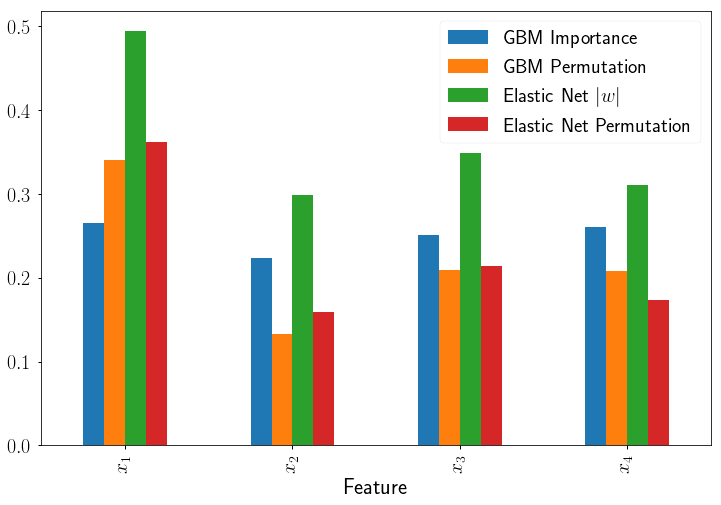

In [63]:
hide_code_in_slideshow()
sns.set_context('notebook',font_scale=2)
fig, ax = plt.subplots(figsize=(12,8))
plot = imp.set_index('Feature').plot(kind='bar', ax=ax)

- What are the implications, and what can we learn from this experiment?

### Partial Dependence Plots

- Imagine we have a subset of features we think are important.
    - This could be based on "feature importance" scores or coefficients, or other reasons (i.e. prior knowledge/research questions/etc.).
    - We may want to dig deeper to explain the relationship between our predictions and these features.
    - **Question**: Why? If we have MDI feature importance scores in hand, what do we not know?


- Directionality:
    - Note in reality we probably have complex, non-monotonic relationships
    - However even if we have a monotonic relationship, or even linear, our MDI wouldn't give any indication on the direction -- obviously weights in a linear model would.
- Partial dependence plots let us dig deeper and visualize the dependence of our prediction function (i.e. predict/predict_proba) on one or two of these features.

### Partial Dependence Plots: Setup

- Consider an arbitrary prediction function $\hat{F}$ learned over a training set $\mathcal{D}$.
- This dataset includes $N$ observations $y_k$ of a target $y$ for $k = 1,2,\cdots,N$, along with $p$ covariates denoted $x_{i,k}$ for $i=1,2,\cdots,p$ and $k=1,2,\cdots,N$. This model generates predictions of the form:
$$\hat{y}_k = \hat{F}(x_{1,k},x_{2,k},\cdots,x_{p,k})$$

- In the case of a single covariate $x_j$, Friedman's partial dependence plots are obtained by computing the following average and plotting it over a useful range of $x$ values:
$$\phi_j(x) = \frac{1}{N}\sum_{k=1}^N\hat{F}(x_{1,k},\cdots,x_{j-1,k},x,x_{j+1,k},\cdots,x_{p,k})$$

- PDPs for more than one variable are computed (then plotted) similarly.
- **Question**: What would a PDP for a linear prediction function look like?

- **Question**: Explain why $\phi_{j}$ is an estimate -- what is it estimating?

### Partial Dependence Plots: A little deeper

- Just to be explicit, consider the partial dependence function for a subset of features $ l \subset \{1,\cdots,p\}$.
- Note the average $\phi_{l}$ is an estimate of
$$ \Phi_l(\mathbf{x}_l) = \int \hat{F}(\mathbf{x}_l,\mathbf{x}_{\setminus l}) p_{\setminus l}(\mathbf{x}_{\setminus l}) d \mathbf{x}_{\setminus l}$$
- i.e. the expected value of the prediction function after marginalizing out $\mathbf{x}_{\setminus l}$.

### PDP Example: California Housing

- Example derived from `sklearn` PDP example, using `sklearn` utilities.
- While not shown, we first train a GBM on the California Housing dataset:

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing

cal_housing = fetch_california_housing()

# split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=0.2,
                                                    random_state=1)
names = cal_housing.feature_names

reg = GradientBoostingRegressor(n_estimators=200,subsample=0.5,
                                random_state=3141)
reg = reg.fit(X_train, y_train)

In [19]:
hide_code_in_slideshow()
print(cal_housing.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




### PDP Example: California Housing

- Example derived from `sklearn` PDP example, using `sklearn` utilities.
- While not shown, we first train a GBM on the California Housing dataset:

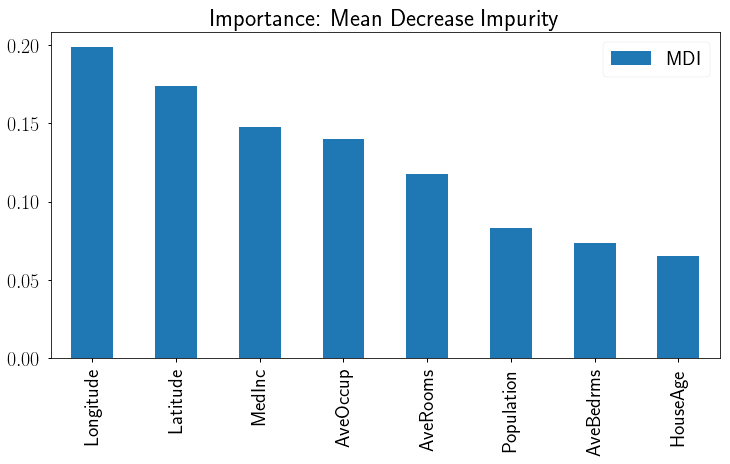

In [66]:
hide_code_in_slideshow()
fig, ax = plt.subplots(figsize=(12,6))
plot = pd.Series(reg.feature_importances_,
                          index=names).rename('MDI').to_frame()\
                  .sort_values('MDI', ascending=False).plot(kind='bar',ax=ax,
                                                            title='Importance: Mean Decrease Impurity')

### PDP Example: California Housing

- Next, we present the PDPs for several single features, and one pair of features.

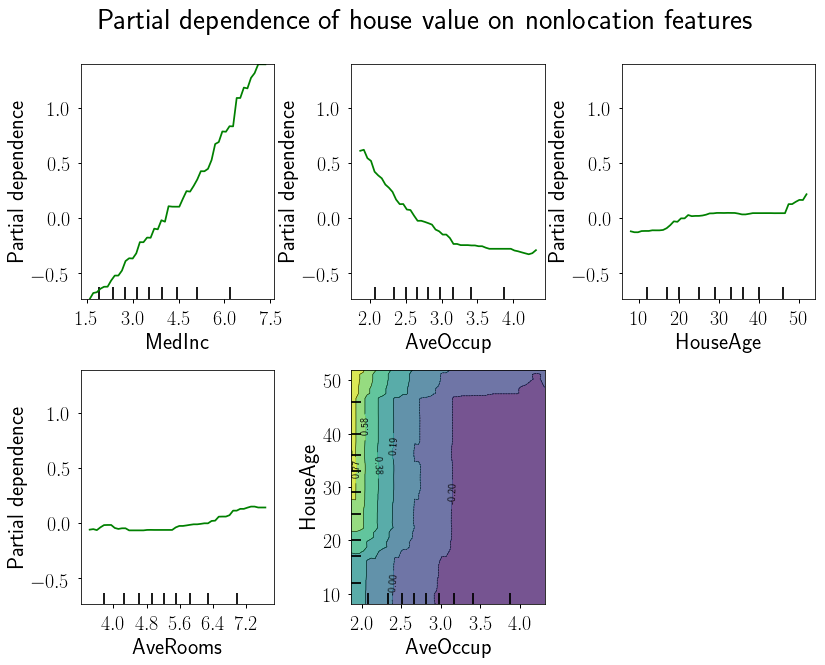

In [21]:
hide_code_in_slideshow()
features = [0, 5, 1, 2, (5, 1)]
fig, ax = plt.subplots(figsize=(12,10))
fig, ax = plot_partial_dependence(reg, X_train, features,
                                  feature_names=names,
                                  n_jobs=3, grid_resolution=50,
                                  ax=ax)
fig.suptitle('Partial dependence of house value on nonlocation features')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle
plt.show()

### PDP Example: California Housing

- Note we don't plot the spatial features -- in fact, what would perhaps be most interesting (and a potential optional extension if you want to on our own) would be to plot the long/lat PDP over a base map.
    - An easy python first pass might simply use `geopandas.`

### PDP Pitfalls:

- Consider the following PDP for a regression problem with $\mathcal{Y} = \mathbb{R}$ and $X = \mathbb{R}^3$.

In [39]:
size = 10000
X1 = np.random.uniform(-1,1,size)
X2 = np.random.uniform(-1,1,size)
X3 = np.random.uniform(-1,1,size)
eps = np.random.normal(0,0.5,size)

Y = 0.2*X1 - 5*X2 + 10*X2*np.where(X3>=0,1,0) + eps

Xs = np.stack([X1,X2,X3]).T

In [42]:
clf = GradientBoostingRegressor(max_depth=3)
params = {'n_estimators':[50,100,200]}
grid = GridSearchCV(clf, param_grid = params, n_jobs = 5, cv = 5)
grid = grid.fit(Xs,Y)

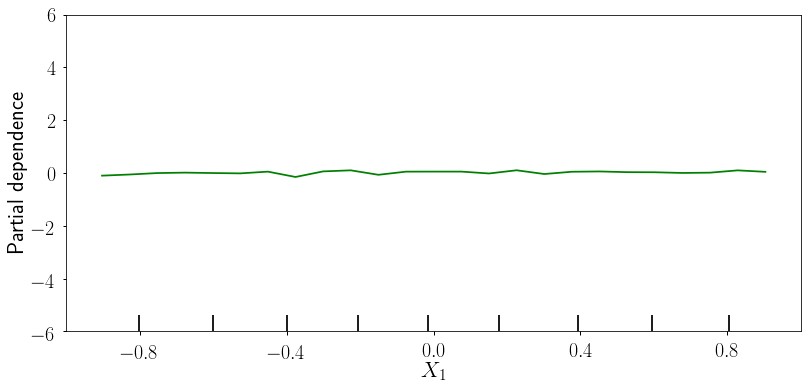

In [49]:
hide_code_in_slideshow()
fig, ax = plt.subplots(figsize=(12,8))
plot_partial_dependence(grid.best_estimator_, Xs, [1],
                        n_jobs=1, grid_resolution=25, ax=ax)
plt.xlim(-1,1)
plt.ylim(-6,6)
plt.xlabel('$X_1$')

pass

- **Question**: What can we learn about the relationship between feature $X_2$ and our target $Y$?

### PDP Pitfalls:

- Here was the data generating process:

In [50]:
size = 10000
X1 = np.random.uniform(-1,1,size)
X2 = np.random.uniform(-1,1,size)
X3 = np.random.uniform(-1,1,size)
eps = np.random.normal(0,0.5,size)
Y = 0.2*X1 - 5*X2 + 10*X2*np.where(X3>=0,1,0) + eps

Xs = np.stack([X1,X2,X3]).T

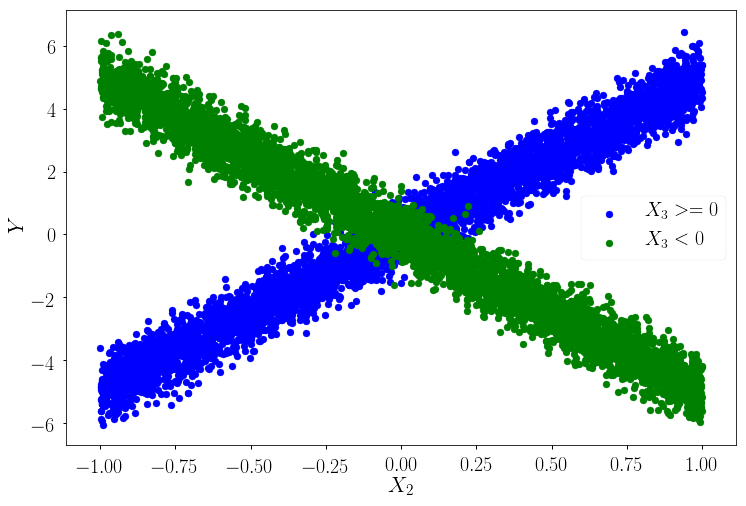

In [67]:
hide_code_in_slideshow()
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X2[X3>=0], Y[X3>=0], color='blue', label='$X_3>=0$')
plt.scatter(X2[X3<0], Y[X3<0], color='green', label='$X_3<0$')
plt.ylabel('$Y$')
plt.xlabel('$X_2$')
plt.legend()
plt.show()

### PDP Pitfalls:

- Recall $$y = 0.2 x_1 - 5 x_2 + 10 x_2 \mathbb{1}(x_3 >= 0) + \varepsilon$$
- **Question**: Why does the PDP fail to reveal the dependence of $y$ on $x_2$?

In his gradient boosting paper, Friedman identified this issue:

- In general, the functional form of $\hat{F}_{z_{\setminus l}}(z_l)$ will depend on the particular values chosen for $z_{\setminus l}$. If, however, this dependence is **not to strong** than the average function can represent a useful summary of the partial dependence of $\hat{F}(x)$ on the chosen variable subset $z_l$.
- In the special cases where the dependence of $\hat{F}(x)$ in $z_l$ is additive
$$\hat{F}(x) = \hat{F}_l(z_l) + \hat{F}_{\setminus l}(z_{\setminus l})$$
or multiplicative
$$\hat{F}(x) = \hat{F}_l(z_l)\hat{F}_{\setminus l}(z_{\setminus l})$$
the *form* of $\hat{F}_{l}(z_l)$ does not depend on the joint values of the complement varaibles $z_{l}$.

### PDP Pitfalls: Another option

- One response to this shortcoming has been development of "Individual Conditional Expectation" plots -- see [Goldstein et al, 2014](https://arxiv.org/pdf/1309.6392.pdf).
- Their insight was that taking an average is a post-processing step that can mask structure.
- We'll use the [`SauceCat/PDPbox`](https://github.com/SauceCat/PDPbox) implementation.

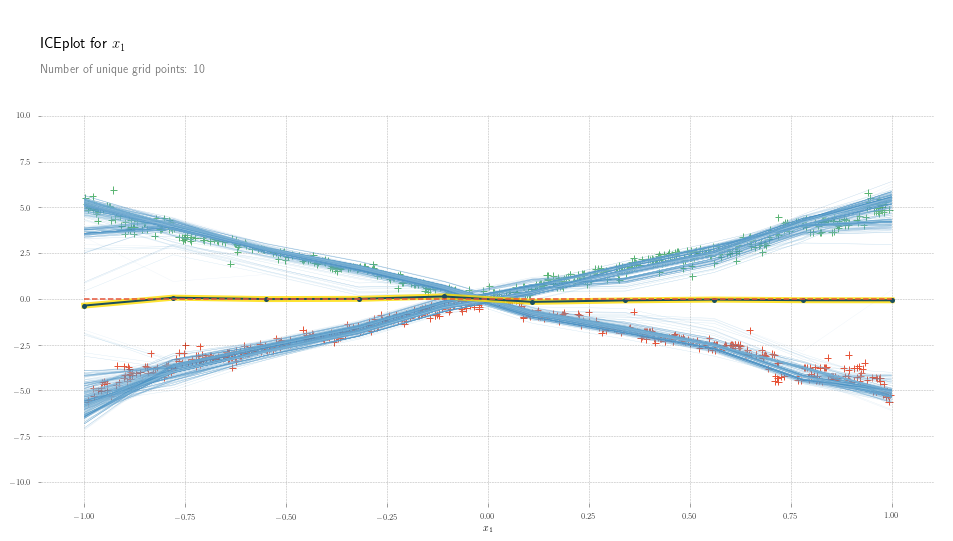

In [61]:
hide_code_in_slideshow()
from pdpbox import pdp

train = pd.DataFrame(Xs)
train.columns = [str(x) for x in train.columns]

pdp_one = pdp.pdp_isolate(grid, train, '1')
pdp.pdp_plot(pdp_one, '$x_1$',
             plot_org_pts=True, plot_lines=True,
             center=False, frac_to_plot=1000)

- **Question**: Note the average (i.e. classic PDP plot) is shown in yellow. How do the additional traces aide clarify the dependence of $y$ on $x_1$?

### Next steps
- We started by talking about feature importance.
    - This gave a set of methods for trying to build insight into how much each feature contributed to the prediction function -- *though we saw this is somewhat ill-defined.* It didn't give insight into even the directionality of simple linear relationships -- let alone more complex stucture.

- Next we looked at PDPs
    - PDPs give some insight into average relationship between one or two predictors and the target. However, this was shown to be potentially misleading, if the average relationship masks interactions.

- This led us to ICEplots, which plot a trace for each data instance separately.

- Note this trajectory (moving from global to data-instance-specific measures of importance) could be extended -- next steps might look at local model explanations such as [LIME](https://arxiv.org/pdf/1602.04938v1.pdf).